In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from xgboost import XGBRegressor
import shap
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import xgboost as xgb

In [85]:
# Load data
# File path to the saved final CSV
output_path = r'../../data/tidy/NTD_Energy.csv'

# Read the CSV file and set the index to 'Agency'
df = pd.read_csv(output_path)

df

,NTD ID,Agency VOMS,Actual Vehicle/Passenger Car Miles,Service Area Population,Primary UZA Area Sq Miles,Mode VOMS_AR,Mode VOMS_CB,Mode VOMS_CC,Mode VOMS_CR,Mode VOMS_DR,...,DRM Mixed Traffic ROW,City,State,UZA,Service Area Sq Miles,Service Area Pop,Latitude,Longitude,Operating,Capital
0,1,18261.0,51015415.0,2287050.0,982.52,0.0,0.0,0.0,0.0,311.0,...,1299.03,Seattle,WA,"80389 - Seattle--Tacoma, WA",2134.0,2287050.0,47.606139,-122.332848,984364098.0,164646549.0
1,2,1116.0,10296150.0,459007.0,171.67,0.0,0.0,0.0,0.0,79.0,...,958.10,Spokane,WA,"83764 - Spokane, WA",248.0,459007.0,47.657971,-117.423532,94356558.0,40289227.0
2,3,1910.0,9841274.0,575963.0,982.52,0.0,0.0,0.0,0.0,77.0,...,499.74,Lakewood,WA,"80389 - Seattle--Tacoma, WA",292.0,575963.0,47.171765,-122.518458,142722484.0,45755527.0
3,5,84.0,1625002.0,110629.0,982.52,0.0,0.0,0.0,0.0,15.0,...,118.40,Everett,WA,"80389 - Seattle--Tacoma, WA",34.0,110629.0,47.978985,-122.202079,23789684.0,945068.0
4,6,132.0,1153763.0,100715.0,55.77,0.0,2.0,0.0,0.0,24.0,...,173.00,Yakima,WA,"97507 - Yakima, WA",33.0,100715.0,46.602230,-120.506096,10272328.0,5946146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,91092,39.0,465640.0,150242.0,37.00,0.0,3.0,0.0,0.0,3.0,...,157.10,Stateline,NV,"99999 - Lake Tahoe, CA-NV",73.0,150242.0,38.962408,-119.939903,6286171.0,4304512.0
527,99422,360.0,8391406.0,784298.0,92.46,0.0,0.0,0.0,0.0,0.0,...,0.00,Stockton,CA,"85087 - Stockton, CA",1426.0,784298.0,37.957702,-121.290780,7029219.0,0.0
528,99423,82.0,1021685.0,223467.0,1636.83,0.0,0.0,0.0,0.0,6.0,...,78.90,Glendale,CA,"51445 - Los Angeles--Long Beach--Anaheim, CA",39.0,223467.0,34.142508,-118.255075,11023704.0,726594.0
529,99424,66.0,958967.0,141371.0,1636.83,0.0,0.0,0.0,0.0,9.0,...,85.00,Pasadena,CA,"51445 - Los Angeles--Long Beach--Anaheim, CA",23.0,141371.0,34.147785,-118.144515,8702389.0,0.0


In [86]:
# Drop columns with more than 10% missing values
threshold = len(df) * 0.95
df = df.dropna(axis=1, thresh=threshold)
df

,NTD ID,Agency VOMS,Actual Vehicle/Passenger Car Miles,Service Area Population,Primary UZA Area Sq Miles,Mode VOMS_AR,Mode VOMS_CB,Mode VOMS_CC,Mode VOMS_CR,Mode VOMS_DR,...,DRM Mixed Traffic ROW,City,State,UZA,Service Area Sq Miles,Service Area Pop,Latitude,Longitude,Operating,Capital
0,1,18261.0,51015415.0,2287050.0,982.52,0.0,0.0,0.0,0.0,311.0,...,1299.03,Seattle,WA,"80389 - Seattle--Tacoma, WA",2134.0,2287050.0,47.606139,-122.332848,984364098.0,164646549.0
1,2,1116.0,10296150.0,459007.0,171.67,0.0,0.0,0.0,0.0,79.0,...,958.10,Spokane,WA,"83764 - Spokane, WA",248.0,459007.0,47.657971,-117.423532,94356558.0,40289227.0
2,3,1910.0,9841274.0,575963.0,982.52,0.0,0.0,0.0,0.0,77.0,...,499.74,Lakewood,WA,"80389 - Seattle--Tacoma, WA",292.0,575963.0,47.171765,-122.518458,142722484.0,45755527.0
3,5,84.0,1625002.0,110629.0,982.52,0.0,0.0,0.0,0.0,15.0,...,118.40,Everett,WA,"80389 - Seattle--Tacoma, WA",34.0,110629.0,47.978985,-122.202079,23789684.0,945068.0
4,6,132.0,1153763.0,100715.0,55.77,0.0,2.0,0.0,0.0,24.0,...,173.00,Yakima,WA,"97507 - Yakima, WA",33.0,100715.0,46.602230,-120.506096,10272328.0,5946146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,91092,39.0,465640.0,150242.0,37.00,0.0,3.0,0.0,0.0,3.0,...,157.10,Stateline,NV,"99999 - Lake Tahoe, CA-NV",73.0,150242.0,38.962408,-119.939903,6286171.0,4304512.0
527,99422,360.0,8391406.0,784298.0,92.46,0.0,0.0,0.0,0.0,0.0,...,0.00,Stockton,CA,"85087 - Stockton, CA",1426.0,784298.0,37.957702,-121.290780,7029219.0,0.0
528,99423,82.0,1021685.0,223467.0,1636.83,0.0,0.0,0.0,0.0,6.0,...,78.90,Glendale,CA,"51445 - Los Angeles--Long Beach--Anaheim, CA",39.0,223467.0,34.142508,-118.255075,11023704.0,726594.0
529,99424,66.0,958967.0,141371.0,1636.83,0.0,0.0,0.0,0.0,9.0,...,85.00,Pasadena,CA,"51445 - Los Angeles--Long Beach--Anaheim, CA",23.0,141371.0,34.147785,-118.144515,8702389.0,0.0


In [87]:
def clean_numeric_columns(df):
    # Replace commas with empty strings and convert to numeric
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col], errors='ignore')
    return df

# Clean the data
df = clean_numeric_columns(df)
df

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\3598043038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(',', '')
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\3598043038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='ignore')


,NTD ID,Agency VOMS,Actual Vehicle/Passenger Car Miles,Service Area Population,Primary UZA Area Sq Miles,Mode VOMS_AR,Mode VOMS_CB,Mode VOMS_CC,Mode VOMS_CR,Mode VOMS_DR,...,DRM Mixed Traffic ROW,City,State,UZA,Service Area Sq Miles,Service Area Pop,Latitude,Longitude,Operating,Capital
0,1,18261.0,51015415.0,2287050.0,982.52,0.0,0.0,0.0,0.0,311.0,...,1299.03,Seattle,WA,80389 - Seattle--Tacoma WA,2134.0,2287050.0,47.606139,-122.332848,984364098.0,164646549.0
1,2,1116.0,10296150.0,459007.0,171.67,0.0,0.0,0.0,0.0,79.0,...,958.10,Spokane,WA,83764 - Spokane WA,248.0,459007.0,47.657971,-117.423532,94356558.0,40289227.0
2,3,1910.0,9841274.0,575963.0,982.52,0.0,0.0,0.0,0.0,77.0,...,499.74,Lakewood,WA,80389 - Seattle--Tacoma WA,292.0,575963.0,47.171765,-122.518458,142722484.0,45755527.0
3,5,84.0,1625002.0,110629.0,982.52,0.0,0.0,0.0,0.0,15.0,...,118.40,Everett,WA,80389 - Seattle--Tacoma WA,34.0,110629.0,47.978985,-122.202079,23789684.0,945068.0
4,6,132.0,1153763.0,100715.0,55.77,0.0,2.0,0.0,0.0,24.0,...,173.00,Yakima,WA,97507 - Yakima WA,33.0,100715.0,46.602230,-120.506096,10272328.0,5946146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,91092,39.0,465640.0,150242.0,37.00,0.0,3.0,0.0,0.0,3.0,...,157.10,Stateline,NV,99999 - Lake Tahoe CA-NV,73.0,150242.0,38.962408,-119.939903,6286171.0,4304512.0
527,99422,360.0,8391406.0,784298.0,92.46,0.0,0.0,0.0,0.0,0.0,...,0.00,Stockton,CA,85087 - Stockton CA,1426.0,784298.0,37.957702,-121.290780,7029219.0,0.0
528,99423,82.0,1021685.0,223467.0,1636.83,0.0,0.0,0.0,0.0,6.0,...,78.90,Glendale,CA,51445 - Los Angeles--Long Beach--Anaheim CA,39.0,223467.0,34.142508,-118.255075,11023704.0,726594.0
529,99424,66.0,958967.0,141371.0,1636.83,0.0,0.0,0.0,0.0,9.0,...,85.00,Pasadena,CA,51445 - Los Angeles--Long Beach--Anaheim CA,23.0,141371.0,34.147785,-118.144515,8702389.0,0.0


In [88]:
df.Cluster.unique()

AttributeError: 'DataFrame' object has no attribute 'Cluster'

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\2107073566.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='total_diesel(gal)', data=df, ax=axes[0], palette=colors)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\2107073566.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(x='Cluster', y='total_diesel(gal)', data=df, ax=axes[0], palette=colors)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\2107073566.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='total_kWh', data=df, ax=axes[1], palette=colors)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\2107073566.py:18: UserWarning: Th

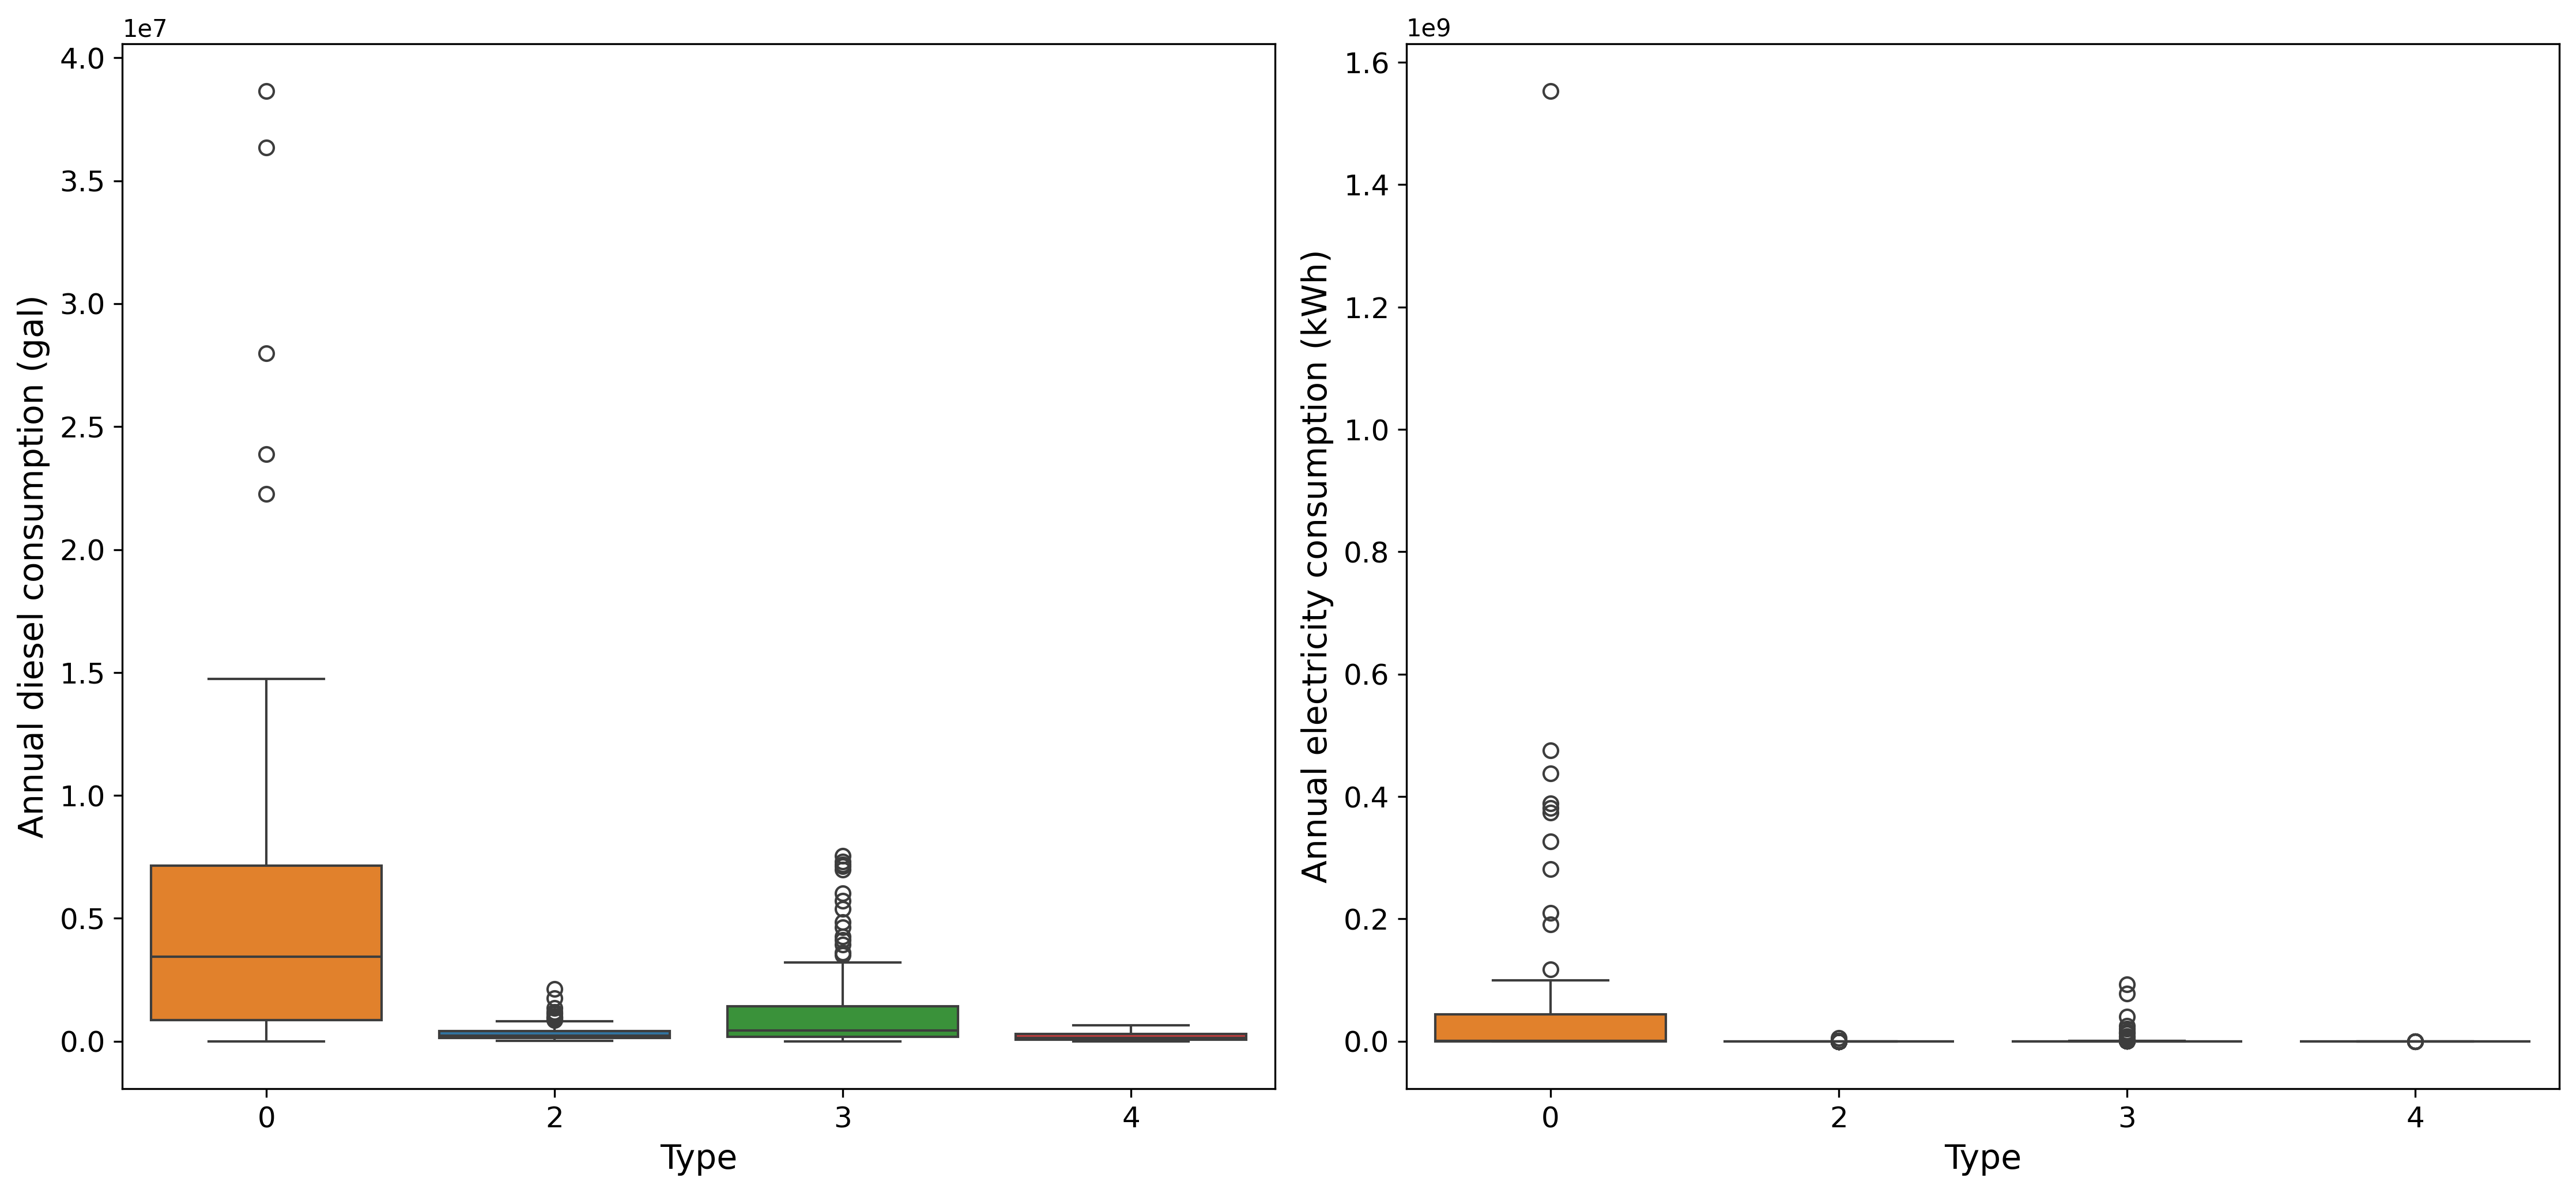

In [7]:
# Define the colors for the clusters
colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']
discrete_cmap = ListedColormap(colors)

# Set the color palette to match the clusters
sns.set_palette(sns.color_palette(colors))

# Create box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 7), dpi=300)

# Boxplot for total_diesel(gal)
sns.boxplot(x='Cluster', y='total_diesel(gal)', data=df, ax=axes[0], palette=colors)
axes[0].set_ylabel('Annual diesel consumption (gal)', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_xlabel('Type', fontsize=14)

# Boxplot for total_kWh
sns.boxplot(x='Cluster', y='total_kWh', data=df, ax=axes[1], palette=colors)
axes[1].set_ylabel('Annual electricity consumption (kWh)', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].set_xlabel('Type', fontsize=14)

plt.tight_layout()
plt.show()


In [8]:
df['Cluster'].unique()

array([0, 3, 2, 4], dtype=int64)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\241890084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diesel Consumption per Capita'] = df['total_diesel(gal)'] / df['Service Area Pop']
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\241890084.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Cluster Name', x='total_diesel(gal)', data=df, ax=axes[0], palette=colors)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\241890084.py:28: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(y='Cluster Name', x='total_diesel(gal)',

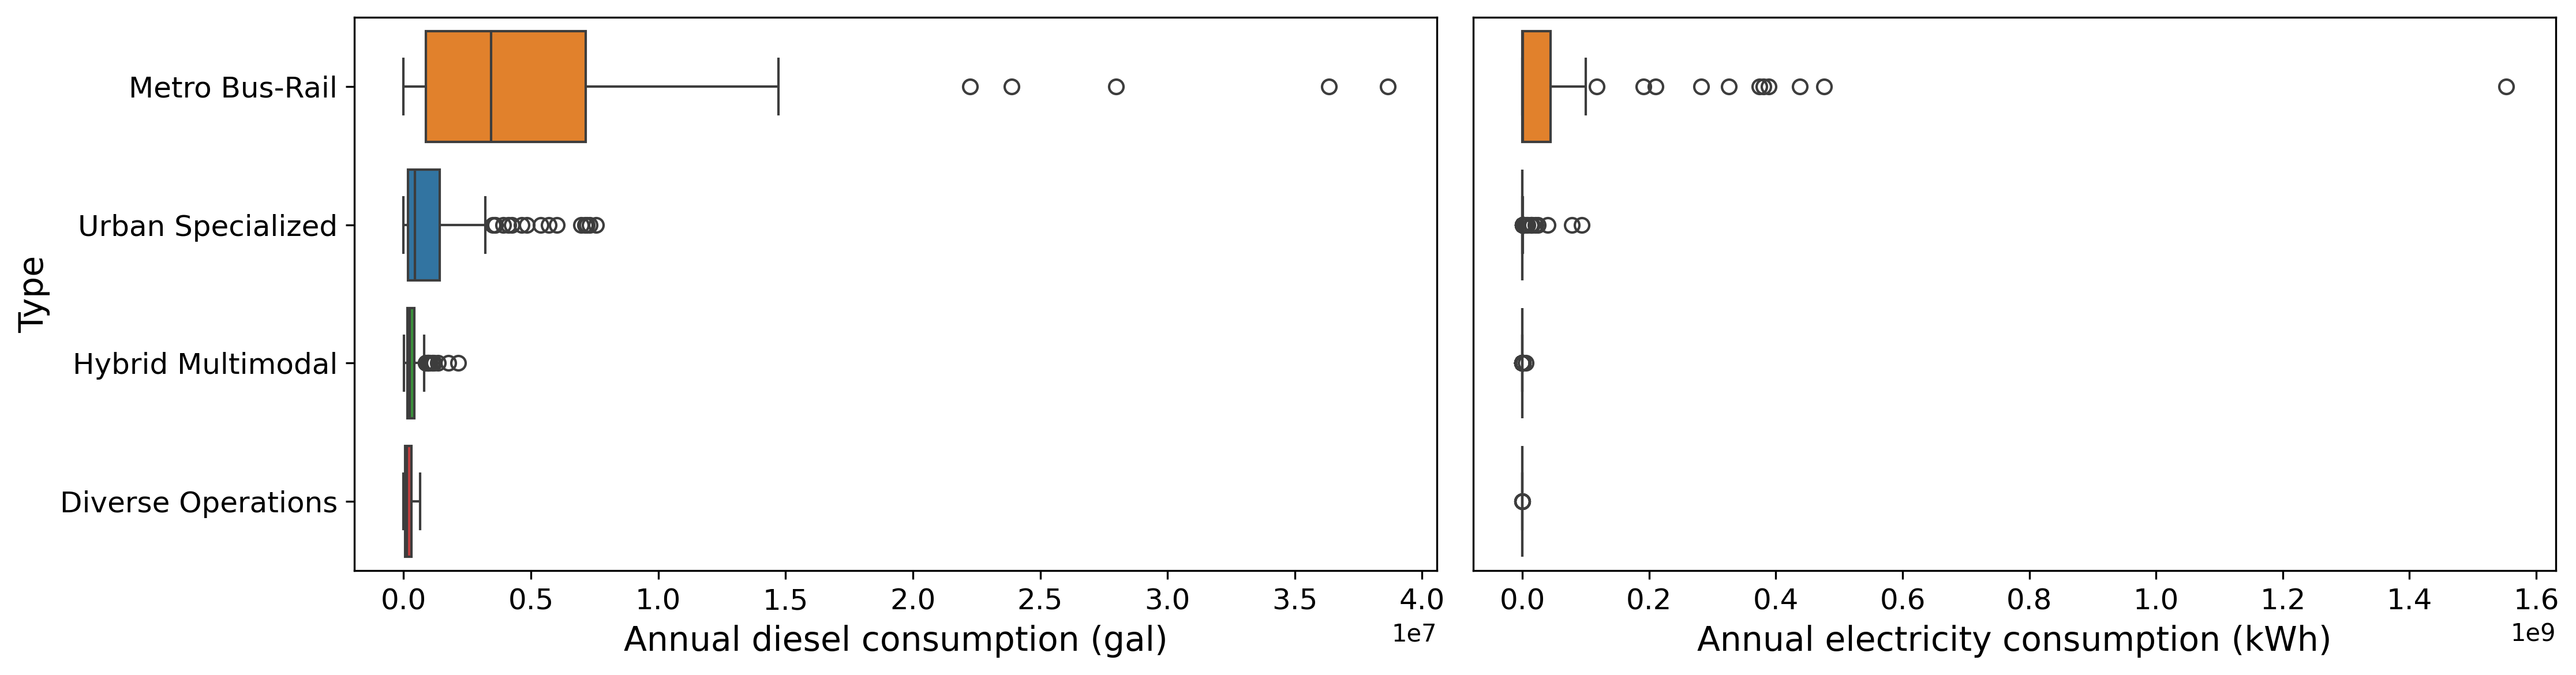

In [9]:
# Calculate per capita values
df['Diesel Consumption per Capita'] = df['total_diesel(gal)'] / df['Service Area Pop']
df['Electricity Consumption per Capita'] = df['total_kWh'] / df['Service Area Pop']

# Define the mapping of clusters to names
cluster_names = {
    0: 'Metro Bus-Rail',
#    1: 'Mid-Urban Multimodal',
    2: 'Hybrid Multimodal',
    3: 'Urban Specialized',
    4: 'Diverse Operations'
}

# Map the clusters to names
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Define the colors for the clusters
colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']
discrete_cmap = ListedColormap(colors)

# Set the color palette to match the clusters
sns.set_palette(sns.color_palette(colors))

# Create horizontal box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=300)

# Boxplot for Diesel Consumption per Capita
sns.boxplot(y='Cluster Name', x='total_diesel(gal)', data=df, ax=axes[0], palette=colors)
axes[0].set_xlabel('Annual diesel consumption (gal)', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_ylabel('Type', fontsize=14)
plt.setp(axes[0].get_yticklabels(), rotation=0, ha="right", fontsize=12)

# Boxplot for Electricity Consumption per Capita
sns.boxplot(y='Cluster Name', x='total_kWh', data=df, ax=axes[1], palette=colors)
axes[1].set_xlabel('Annual electricity consumption (kWh)', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].set_ylabel('', fontsize=14)
axes[1].set_yticklabels([])
axes[1].set_yticks([])

plt.tight_layout()
plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\4029527884.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Cluster Name', x='Diesel Consumption per Capita', data=df, ax=axes[0], palette=colors)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\4029527884.py:28: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(y='Cluster Name', x='Diesel Consumption per Capita', data=df, ax=axes[0], palette=colors)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_63392\4029527884.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Cluster Name', x='Electricity Consumption per Capita', data=df, ax=axes[1], palette=colors)
C:\Users\Mahsa\AppD

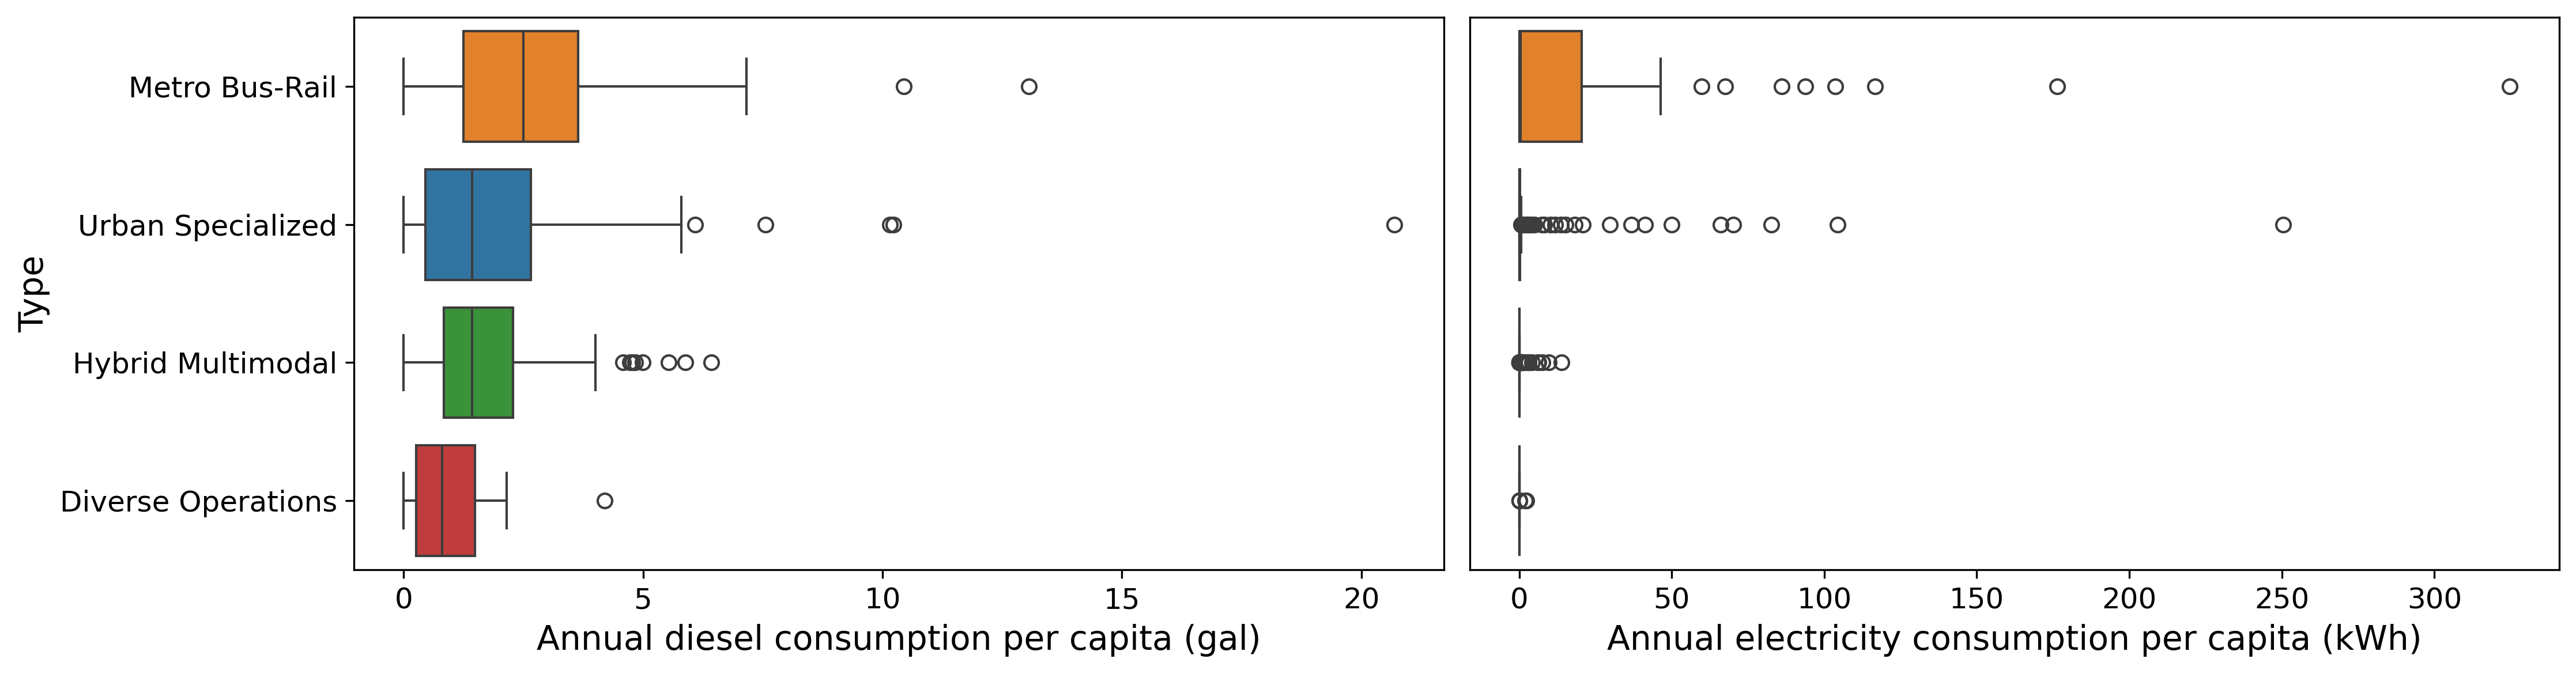

In [10]:
# Calculate per capita values
df['Diesel Consumption per Capita'] = df['total_diesel(gal)'] / df['Service Area Pop']
df['Electricity Consumption per Capita'] = df['total_kWh'] / df['Service Area Pop']

# Define the mapping of clusters to names
cluster_names = {
    0: 'Metro Bus-Rail',
#    1: 'Mid-Urban Multimodal',
    2: 'Hybrid Multimodal',
    3: 'Urban Specialized',
    4: 'Diverse Operations'
}

# Map the clusters to names
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Define the colors for the clusters
colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']
discrete_cmap = ListedColormap(colors)

# Set the color palette to match the clusters
sns.set_palette(sns.color_palette(colors))

# Create horizontal box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=300)

# Boxplot for Diesel Consumption per Capita
sns.boxplot(y='Cluster Name', x='Diesel Consumption per Capita', data=df, ax=axes[0], palette=colors)
axes[0].set_xlabel('Annual diesel consumption per capita (gal)', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_ylabel('Type', fontsize=14)
plt.setp(axes[0].get_yticklabels(), rotation=0, ha="right", fontsize=12)

# Boxplot for Electricity Consumption per Capita
sns.boxplot(y='Cluster Name', x='Electricity Consumption per Capita', data=df, ax=axes[1], palette=colors)
axes[1].set_xlabel('Annual electricity consumption per capita (kWh)', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].set_ylabel('', fontsize=14)
axes[1].set_yticklabels([])
axes[1].set_yticks([])

plt.tight_layout()
plt.show()


In [11]:
# Show rows where total_diesel(gal) is zero
zero_diesel_rows = df[df['total_diesel(gal)'] == 0]
print("Rows where total_diesel(gal) is zero:")
zero_diesel_rows

Rows where total_diesel(gal) is zero:


,NTD ID,Agency VOMS,Actual Vehicle/Passenger Car Miles,Service Area Population,Primary UZA Area Sq Miles,Mode VOMS_AR,Mode VOMS_CB,Mode VOMS_CC,Mode VOMS_CR,Mode VOMS_DR,...,Service Area Sq Miles,Service Area Pop,Latitude,Longitude,Operating,Capital,Cluster,Diesel Consumption per Capita,Electricity Consumption per Capita,Cluster Name
14,23,8.0,228303.0,753655.0,982.52,0.0,0.0,0.0,0.0,0.0,...,83.0,753655.0,47.606139,-122.332848,4893793.0,1679684.0,0,0.0,0.651707,Metro Bus-Rail
27,58,28.0,381460.0,97377.0,519.30,0.0,0.0,0.0,0.0,0.0,...,11.0,97377.0,45.515232,-122.678385,21803238.0,27887.0,0,0.0,29.088317,Metro Bus-Rail
79,20075,60.0,5119230.0,159726.0,1898.19,0.0,0.0,0.0,0.0,0.0,...,16.0,159726.0,39.925946,-75.119620,57486662.0,32103002.0,3,0.0,250.476460,Urban Specialized
86,20098,274.0,12974558.0,3134256.0,3248.12,0.0,0.0,0.0,0.0,0.0,...,226.0,3134256.0,40.712775,-74.005973,481245434.0,260415683.0,3,0.0,29.780582,Urban Specialized
87,20099,44.0,2663396.0,495747.0,3248.12,0.0,0.0,0.0,0.0,0.0,...,59.0,495747.0,40.579532,-74.150201,75939529.0,57552904.0,3,0.0,50.032464,Urban Specialized
139,30057,20.0,1606581.0,3371466.0,1898.19,0.0,0.0,0.0,20.0,0.0,...,2092.0,3371466.0,40.273191,-76.886701,24920257.0,31808263.0,3,0.0,4.036343,Urban Specialized
161,30107,48.0,522735.0,60547.0,40.70,0.0,0.0,0.0,0.0,0.0,...,12.0,60547.0,39.629526,-79.955897,9086668.0,878465.0,0,0.0,15.833518,Metro Bus-Rail
308,50104,70.0,2727755.0,958644.0,2337.89,0.0,0.0,0.0,70.0,0.0,...,1970.0,958644.0,41.610594,-87.064199,61774445.0,326065666.0,3,0.0,13.711294,Urban Specialized
314,50141,4.0,20123.0,92477.0,1284.83,0.0,0.0,0.0,0.0,0.0,...,3.0,92477.0,42.331427,-83.045754,11964407.0,3337766.0,3,0.0,18.285195,Urban Specialized
339,50213,4.0,122684.0,21738.0,1284.83,0.0,0.0,0.0,0.0,0.0,...,6.0,21738.0,42.331427,-83.045754,10018878.0,567897.0,3,0.0,104.357899,Urban Specialized


In [12]:
# Drop rows where total_diesel(gal) is zero
df = df[df['total_diesel(gal)'] != 0]

In [13]:
# Define the columns to exclude
columns_to_exclude = ['total_kWh', 'total_diesel(gal)', 'NTD ID', 'City', 'State', 'UZA', 'Latitude', 'Longitude']

# Select features (X) and target variables (y)
X = df.drop(columns=columns_to_exclude)
#y = df[['total_diesel(gal)', 'total_kWh']]
y = df['total_diesel(gal)']


In [14]:
# Display rows that contain NaN values
rows_with_nan = X[X.isna().any(axis=1)]

# Show the result
rows_with_nan


,Agency VOMS,Actual Vehicle/Passenger Car Miles,Service Area Population,Primary UZA Area Sq Miles,Mode VOMS_AR,Mode VOMS_CB,Mode VOMS_CC,Mode VOMS_CR,Mode VOMS_DR,Mode VOMS_FB,...,Non-Statutory Mixed Traffic,DRM Mixed Traffic ROW,Service Area Sq Miles,Service Area Pop,Operating,Capital,Cluster,Diesel Consumption per Capita,Electricity Consumption per Capita,Cluster Name


In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Identify categorical and numerical columns
categorical_features = ['Cluster Name']  
numerical_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

In [17]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


## Random Forest Regressor 

In [18]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Check the data types of the columns
print(df.dtypes)

NTD ID                                  int64
Agency VOMS                           float64
Actual Vehicle/Passenger Car Miles    float64
Service Area Population               float64
Primary UZA Area Sq Miles             float64
                                       ...   
Capital                               float64
Cluster                                 int64
Diesel Consumption per Capita         float64
Electricity Consumption per Capita    float64
Cluster Name                           object
Length: 177, dtype: object


In [21]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Agency VOMS',
                                                   'Actual Vehicle/Passenger '
                                                   'Car Miles',
                                                   'Service Area Population',
                                                   'Primary UZA Area Sq Miles',
                                                   'Mode VOMS_AR',
                                                   'Mode VOMS_CB',
                                                   'Mode VOMS_CC',
                                                   'Mode VOMS_CR',
                                                   'Mode VOMS_DR',
                                                   'Mode...
                                                   'Mode VOMS_TB',
                                                   'Mode VOMS_TR',
                                                   'Mode VOMS_VP',
                                                   'Mode VOMS_YR', 'FARES_AR',
                                                   'FARES_CB', 'FARES_CC',
                                                   'FARES_CR', 'FARES_DR',
                                                   'FARES_DT', 'FARES_FB',
                                                   'FARES_HR', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cluster Name'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [22]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse_total_diesel = mean_squared_error(y_test, y_pred)
mape_total_diesel = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error for total_diesel(gal): {mse_total_diesel}')
print(f'Mean Absolute Percentage Error for total_diesel(gal): {mape_total_diesel}')


Mean Squared Error for total_diesel(gal): 11817770951220.594
Mean Absolute Percentage Error for total_diesel(gal): 0.21873272827035317


In [23]:
# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['pred_total_diesel(gal)'], index=y_test.index)

# Calculate MAPE for each row
y_test_df = y_test.to_frame()
y_test_df['MAPE_total_diesel(gal)'] = (y_test_df['total_diesel(gal)'] - y_pred_df['pred_total_diesel(gal)']).abs() / y_test_df['total_diesel(gal)']

# Combine the actual values, predictions, and MAPE
comparison_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Display the first few rows to inspect
comparison_df

,total_diesel(gal),MAPE_total_diesel(gal),pred_total_diesel(gal)
312,23872392.0,0.649736,8361637.60
515,3609188.0,0.584716,1498839.39
456,2983134.0,0.100003,2684810.35
159,141486.0,0.002926,141072.08
517,888006.0,0.492150,450973.55
...,...,...,...
411,154221.0,0.194186,124273.41
174,321756.0,0.193146,259610.26
282,1592964.0,0.212187,1254958.31
523,60156.0,0.118241,67268.90


In [24]:
# Analyze MAPE by different segments or clusters
comparison_df['Cluster'] = X_test['Cluster']
cluster_mape = comparison_df.groupby('Cluster')['MAPE_total_diesel(gal)'].mean()
print(cluster_mape)


Cluster
0    0.396346
2    0.149163
3    0.233931
4    0.144778
Name: MAPE_total_diesel(gal), dtype: float64


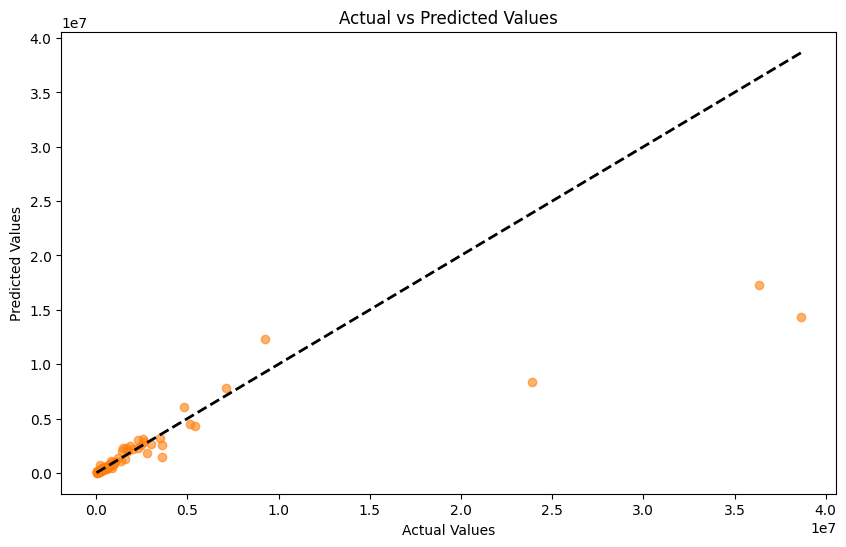

In [25]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
#plt.title('Actual vs Predicted Values')
plt.show()


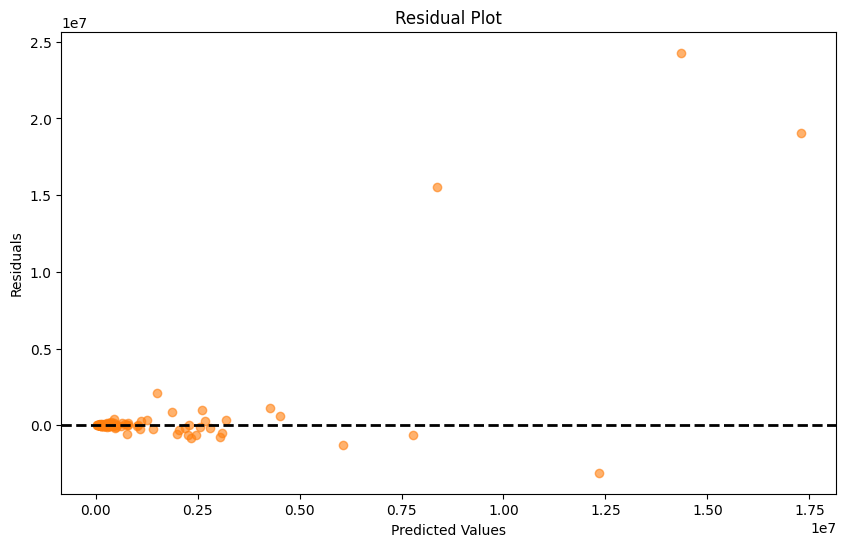

In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [27]:
# Calculate residuals
comparison_df['Residuals'] = y_test - y_pred

# Sort the DataFrame by the absolute value of residuals
comparison_df['Absolute Residuals'] = comparison_df['Residuals'].abs()
sorted_comparison_df = comparison_df.sort_values(by='Absolute Residuals', ascending=False)

# Display the top 5 rows with the largest residuals
print("Top 5 outliers based on residuals:")
sorted_comparison_df.head(5)

# Extract the indices of the top 5 outliers
outlier_indices = sorted_comparison_df.head(5).index

# Inspect the original features of these outliers
outlier_features = X_test.loc[outlier_indices]
print("Features of the top 5 outliers:")
outlier_features


Top 5 outliers based on residuals:
Features of the top 5 outliers:


,Agency VOMS,Actual Vehicle/Passenger Car Miles,Service Area Population,Primary UZA Area Sq Miles,Mode VOMS_AR,Mode VOMS_CB,Mode VOMS_CC,Mode VOMS_CR,Mode VOMS_DR,Mode VOMS_FB,...,Non-Statutory Mixed Traffic,DRM Mixed Traffic ROW,Service Area Sq Miles,Service Area Pop,Operating,Capital,Cluster,Diesel Consumption per Capita,Electricity Consumption per Capita,Cluster Name
82,26312.0,187806013.0,10594013.0,3248.12,0.0,0.0,0.0,865.0,340.0,0.0,...,0.0,6114.20,5325.0,10594013.0,2.663605e+09,5.523401e+08,0,3.648172,35.946400,Metro Bus-Rail
74,50095.0,491106831.0,8804190.0,3248.12,0.0,443.0,0.0,0.0,824.0,0.0,...,0.0,1953.70,321.0,8804190.0,9.656693e+09,3.198206e+09,0,4.129192,176.400789,Metro Bus-Rail
312,1778.0,39319881.0,7261176.0,2337.89,0.0,0.0,0.0,889.0,0.0,0.0,...,0.0,0.00,1940.0,7261176.0,8.445472e+08,2.701400e+08,0,3.287676,8.590058,Metro Bus-Rail
0,18261.0,51015415.0,2287050.0,982.52,0.0,0.0,0.0,0.0,311.0,2.0,...,0.0,1299.03,2134.0,2287050.0,9.843641e+08,1.646465e+08,0,4.046211,7.773562,Metro Bus-Rail
515,11.0,548278.0,345375.0,513.80,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.00,127.0,345375.0,4.681574e+07,1.354680e+07,0,10.450056,0.000000,Metro Bus-Rail


## XGBoost model

XGBoost (eXtreme Gradient Boosting) is a machine learning algorithm based on the gradient boosting framework, which builds an ensemble of decision trees to improve prediction accuracy. It works by sequentially training trees, where each tree corrects the errors of the previous ones. Known for its efficiency, speed, and scalability, XGBoost includes features like regularization to prevent overfitting, parallel computation, and handling of missing data, making it highly effective for structured data tasks such as classification and regression.

In [28]:
# Define the XGBoost model
xgboost_model = XGBRegressor(n_estimators=100, random_state=42)

# Create a pipeline with the preprocessor and XGBoost model
xgboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', xgboost_model)])

# Train the XGBoost model
xgboost_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost_pipeline.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'Mean Squared Error for XGBoost: {mse_xgb}')
print(f'Mean Absolute Percentage Error for XGBoost: {mape_xgb}')


Mean Squared Error for XGBoost: 6802907778549.125
Mean Absolute Percentage Error for XGBoost: 0.23930770204680973


In [31]:
# Define the XGBoost model
xgboost_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid for XGBoost (reduced search space)
param_grid = {
    'model__n_estimators': [100, 200],  
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],  
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8, 1.0],  
    'model__colsample_bytree': [0.8, 1.0], 
    'model__gamma': [0, 0.1],
    'model__lambda': [1, 1.5],   
    'model__alpha': [0, 0.1]   
}

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgboost_model)])

# Wrap the search in a progress bar using tqdm
# Define the RandomizedSearchCV with 50 iterations
n_iter_search = 50
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=n_iter_search, cv=5, n_jobs=-1, 
                                   verbose=2, scoring='neg_mean_absolute_percentage_error', random_state=42)

# Progress bar using tqdm
with tqdm(total=n_iter_search) as pbar:
    for i in range(n_iter_search):
        # For each iteration, perform a fit and update the progress bar
        random_search.fit(X_train, y_train)
        pbar.update(1)

# Print the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Predict using the best model
y_pred_optimized = random_search.predict(X_test)

# Evaluate the model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mape_optimized = mean_absolute_percentage_error(y_test, y_pred_optimized)

print(f'Mean Squared Error after tuning: {mse_optimized}')
print(f'Mean Absolute Percentage Error after tuning: {mape_optimized}')


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  2%|█▋                                                                                 | 1/50 [01:07<55:30, 67.98s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  4%|███▏                                                                            | 2/50 [03:12<1:21:07, 101.41s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  6%|████▊                                                                            | 3/50 [04:03<1:01:19, 78.29s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  8%|██████▋                                                                            | 4/50 [04:48<49:52, 65.06s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 10%|████████▎                                                                          | 5/50 [05:27<41:50, 55.78s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 12%|█████████▉                                                                         | 6/50 [06:04<36:11, 49.36s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 14%|███████████▌                                                                       | 7/50 [06:43<32:49, 45.79s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 16%|█████████████▎                                                                     | 8/50 [07:37<34:02, 48.64s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 18%|██████████████▉                                                                    | 9/50 [09:16<44:00, 64.40s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 20%|████████████████▍                                                                 | 10/50 [10:32<45:15, 67.88s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 22%|██████████████████                                                                | 11/50 [11:11<38:20, 58.98s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 24%|███████████████████▋                                                              | 12/50 [11:48<33:13, 52.47s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 26%|█████████████████████▎                                                            | 13/50 [12:27<29:49, 48.36s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 28%|██████████████████████▉                                                           | 14/50 [13:11<28:09, 46.93s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 30%|████████████████████████▌                                                         | 15/50 [14:04<28:30, 48.86s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 32%|██████████████████████████▏                                                       | 16/50 [14:59<28:38, 50.55s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 34%|███████████████████████████▉                                                      | 17/50 [16:04<30:19, 55.13s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 36%|█████████████████████████████▌                                                    | 18/50 [16:52<28:07, 52.73s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 38%|███████████████████████████████▏                                                  | 19/50 [17:30<25:05, 48.57s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 40%|████████████████████████████████▊                                                 | 20/50 [18:10<22:57, 45.91s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 42%|██████████████████████████████████▍                                               | 21/50 [19:04<23:22, 48.35s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 44%|████████████████████████████████████                                              | 22/50 [20:36<28:38, 61.37s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 46%|█████████████████████████████████████▋                                            | 23/50 [21:49<29:15, 65.00s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 48%|███████████████████████████████████████▎                                          | 24/50 [22:30<25:01, 57.75s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 50%|█████████████████████████████████████████                                         | 25/50 [23:10<21:50, 52.40s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 52%|██████████████████████████████████████████▋                                       | 26/50 [24:05<21:12, 53.00s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 54%|████████████████████████████████████████████▎                                     | 27/50 [25:42<25:26, 66.35s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 56%|█████████████████████████████████████████████▉                                    | 28/50 [26:52<24:39, 67.26s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 58%|███████████████████████████████████████████████▌                                  | 29/50 [27:38<21:19, 60.93s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 60%|█████████████████████████████████████████████████▏                                | 30/50 [28:25<18:56, 56.84s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 62%|██████████████████████████████████████████████████▊                               | 31/50 [29:56<21:13, 67.04s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 64%|████████████████████████████████████████████████████▍                             | 32/50 [31:15<21:11, 70.67s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 66%|██████████████████████████████████████████████████████                            | 33/50 [31:59<17:43, 62.58s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [33:07<17:10, 64.42s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [34:03<15:26, 61.79s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 72%|███████████████████████████████████████████████████████████                       | 36/50 [34:42<12:48, 54.88s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [35:24<11:03, 51.00s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [36:12<10:03, 50.25s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [37:40<11:15, 61.42s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [38:27<09:32, 57.23s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [39:09<07:54, 52.68s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [39:48<06:26, 48.37s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [40:30<05:27, 46.74s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [41:59<05:55, 59.18s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [43:12<05:16, 63.32s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [43:52<03:45, 56.48s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [44:30<02:32, 50.94s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [45:09<01:34, 47.37s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [45:54<00:46, 46.68s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [47:37<00:00, 57.15s/it]

Best Parameters: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__min_child_weight': 1, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__lambda': 1.5, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0, 'model__alpha': 0}
Mean Squared Error after tuning: 6639282952658.116
Mean Absolute Percentage Error after tuning: 0.24224723886156158


In [32]:
# Best parameters from the grid search
best_params = {
    'subsample': 0.8,
    'n_estimators': 200,
    'min_child_weight': 1,
    'max_depth': 5,
    'learning_rate': 0.1,
    'lambda': 1.5,   # L2 regularization
    'gamma': 0.1,
    'colsample_bytree': 1.0,
    'alpha': 0  # L1 regularization
}

# Create the final XGBoost model with the best parameters
xgboost_best_model = XGBRegressor(
    random_state=42,
    subsample=best_params['subsample'],
    n_estimators=best_params['n_estimators'],
    min_child_weight=best_params['min_child_weight'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    reg_lambda=best_params['lambda'],  # L2 regularization
    gamma=best_params['gamma'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['alpha']  # L1 regularization
)

# Create the pipeline again with the best model
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', xgboost_best_model)])

# Fit the final model on the training data
best_pipeline.fit(X_train, y_train)

# Predict using the final model
y_pred_final = best_pipeline.predict(X_test)

# Evaluate the final model
mse_final = mean_squared_error(y_test, y_pred_final)
mape_final = mean_absolute_percentage_error(y_test, y_pred_final)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse_final}')
print(f'Mean Absolute Percentage Error: {mape_final}')

Mean Squared Error: 6639282952658.116
Mean Absolute Percentage Error: 0.24224723886156158


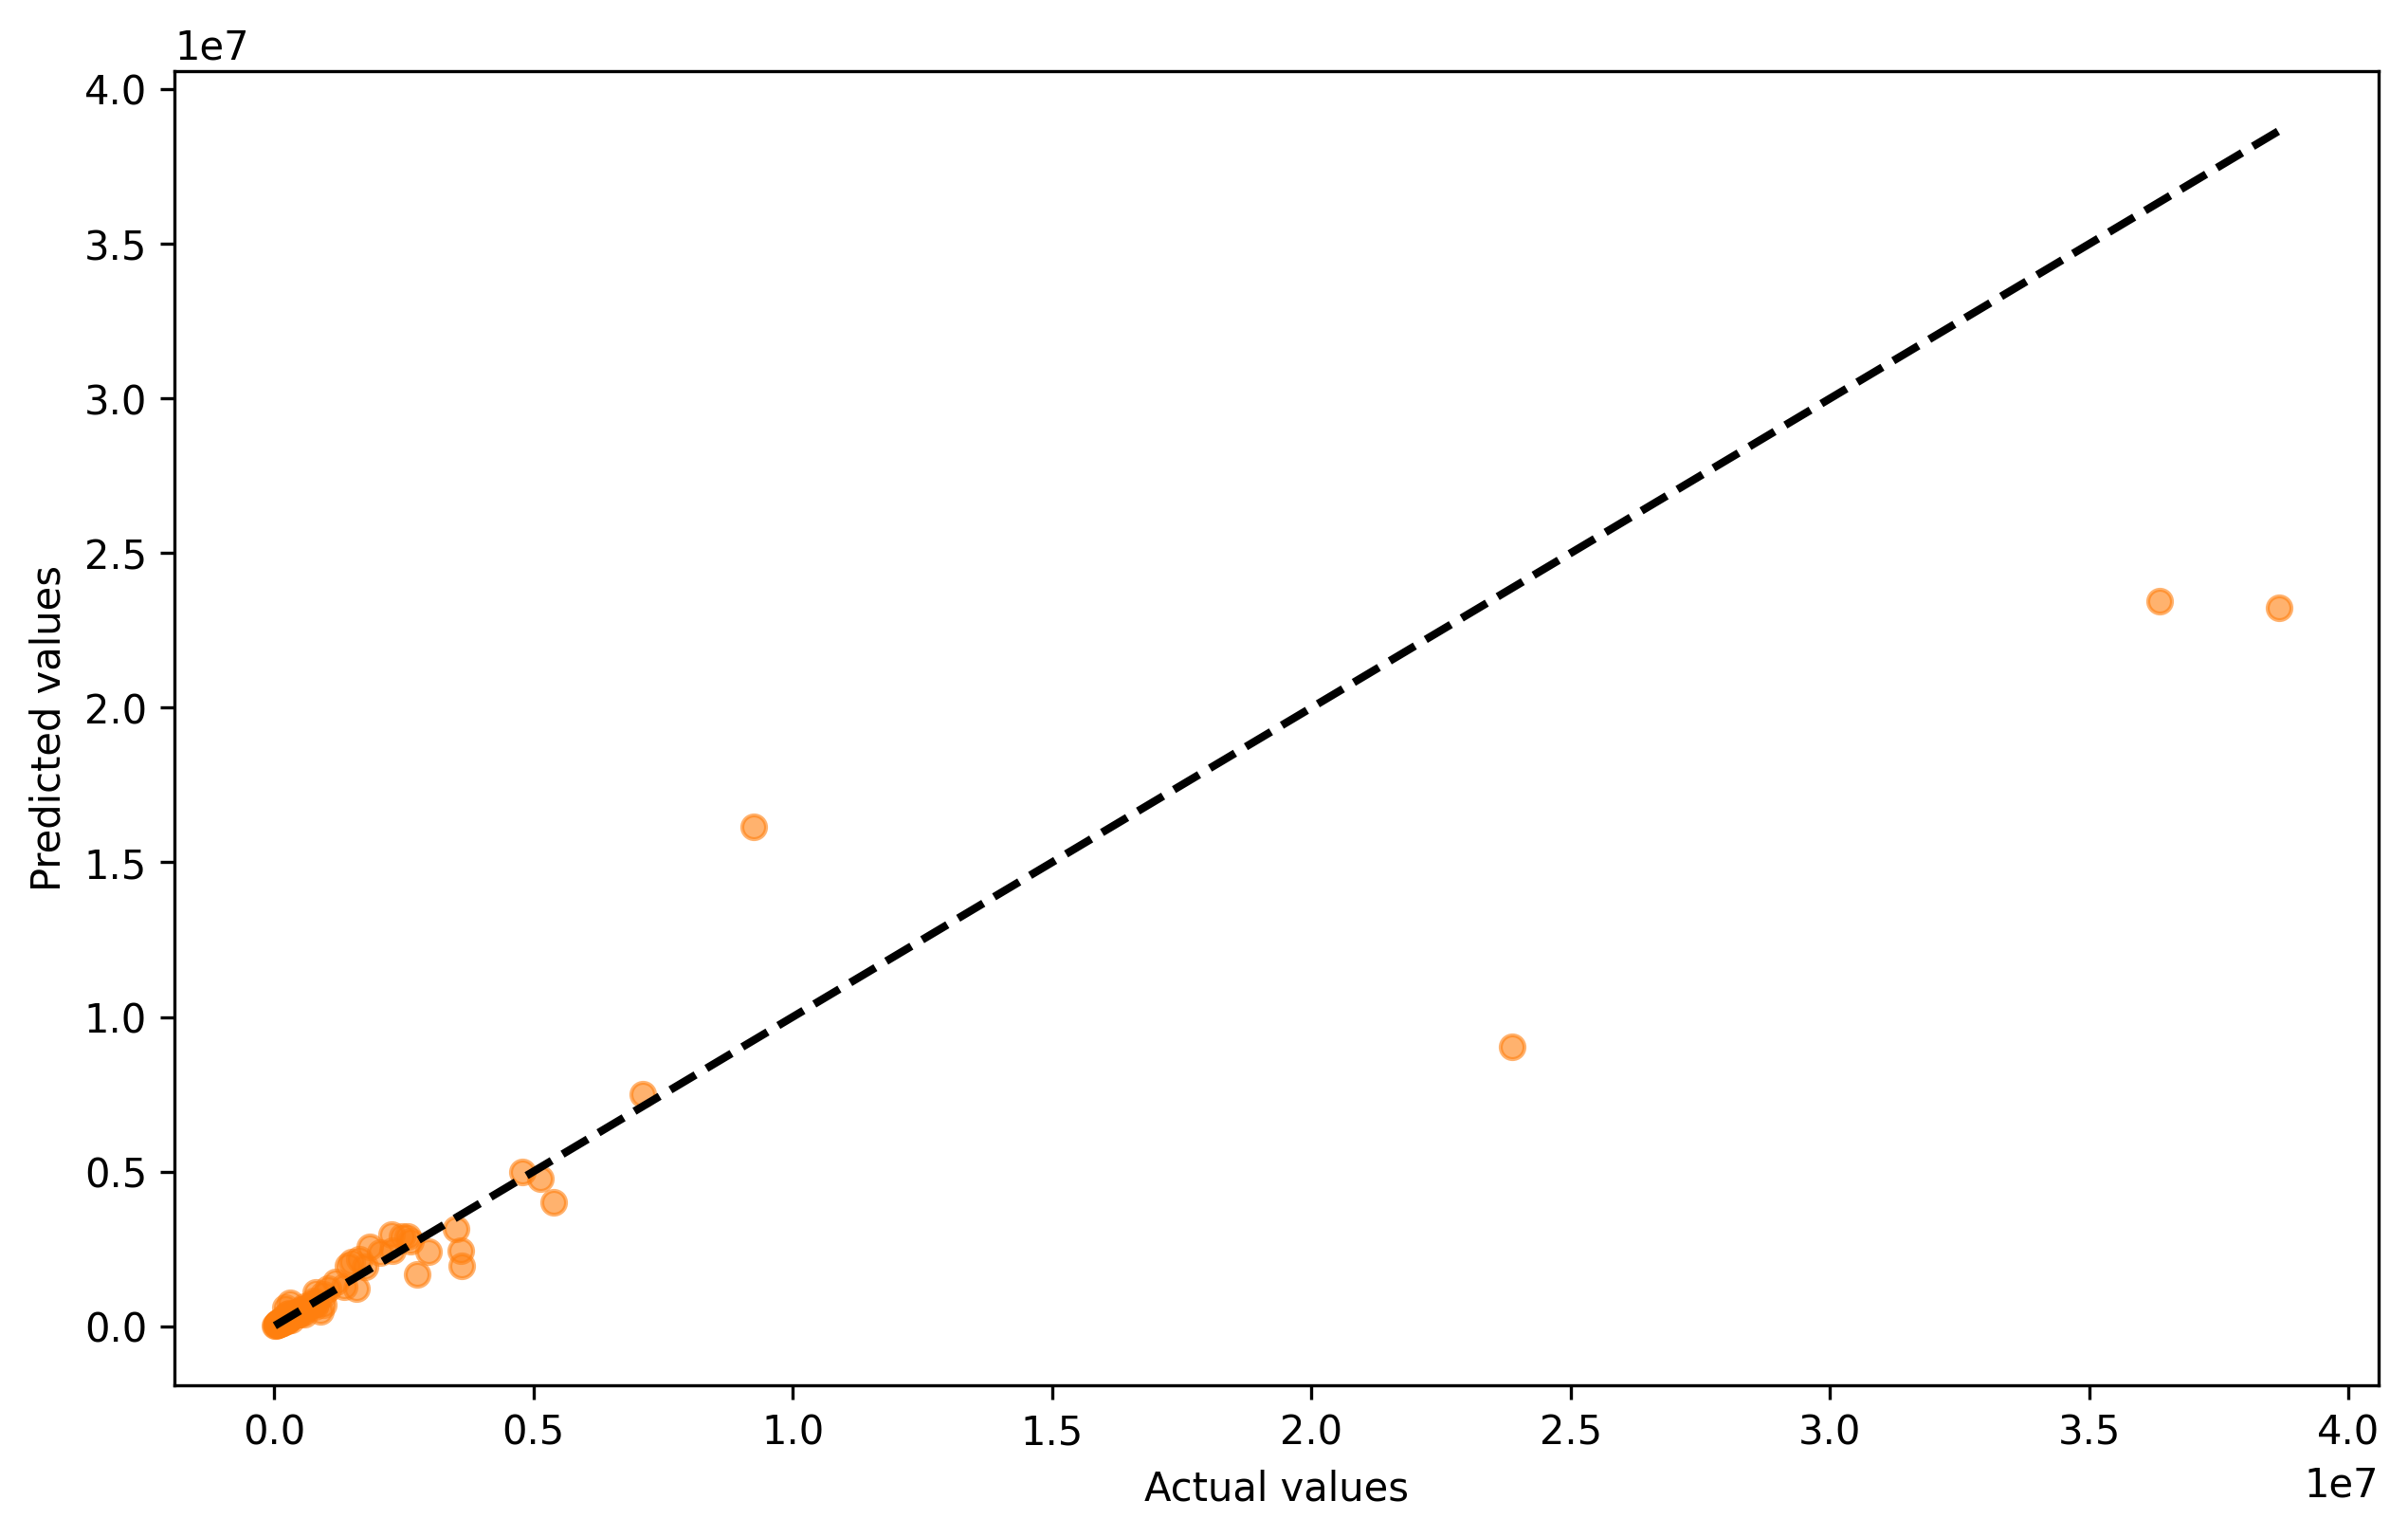

In [51]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(y_test, y_pred_final, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
#plt.title('Actual vs Predicted Values')
plt.show()


### Outliers analysis

In [55]:
# Calculate residuals
residuals = np.abs(y_test - y_pred_final)

# Define a threshold to detect outliers (top 3% of residuals)
threshold = np.percentile(residuals, 97)

# Flag outliers where the residual is above the threshold
outliers = X_test[residuals > threshold]

outliers

,Agency VOMS,Actual Vehicle/Passenger Car Miles,Service Area Population,Primary UZA Area Sq Miles,Mode VOMS_AR,Mode VOMS_CB,Mode VOMS_CC,Mode VOMS_CR,Mode VOMS_DR,Mode VOMS_FB,...,Non-Statutory Mixed Traffic,DRM Mixed Traffic ROW,Service Area Sq Miles,Service Area Pop,Operating,Capital,Cluster,Diesel Consumption per Capita,Electricity Consumption per Capita,Cluster Name
312,1778.0,39319881.0,7261176.0,2337.89,0.0,0.0,0.0,889.0,0.0,0.0,...,0.0,0.00,1940.0,7261176.0,8.445472e+08,2.701400e+08,0,3.287676,8.590058,Metro Bus-Rail
74,50095.0,491106831.0,8804190.0,3248.12,0.0,443.0,0.0,0.0,824.0,0.0,...,0.0,1953.70,321.0,8804190.0,9.656693e+09,3.198206e+09,0,4.129192,176.400789,Metro Bus-Rail
0,18261.0,51015415.0,2287050.0,982.52,0.0,0.0,0.0,0.0,311.0,2.0,...,0.0,1299.03,2134.0,2287050.0,9.843641e+08,1.646465e+08,0,4.046211,7.773562,Metro Bus-Rail
82,26312.0,187806013.0,10594013.0,3248.12,0.0,0.0,0.0,865.0,340.0,0.0,...,0.0,6114.20,5325.0,10594013.0,2.663605e+09,5.523401e+08,0,3.648172,35.946400,Metro Bus-Rail


In [56]:
outliers.columns

Index(['Agency VOMS', 'Actual Vehicle/Passenger Car Miles',
       'Service Area Population', 'Primary UZA Area Sq Miles', 'Mode VOMS_AR',
       'Mode VOMS_CB', 'Mode VOMS_CC', 'Mode VOMS_CR', 'Mode VOMS_DR',
       'Mode VOMS_FB',
       ...
       'Non-Statutory Mixed Traffic', 'DRM Mixed Traffic ROW',
       'Service Area Sq Miles', 'Service Area Pop', 'Operating', 'Capital',
       'Cluster', 'Diesel Consumption per Capita',
       'Electricity Consumption per Capita', 'Cluster Name'],
      dtype='object', length=169)

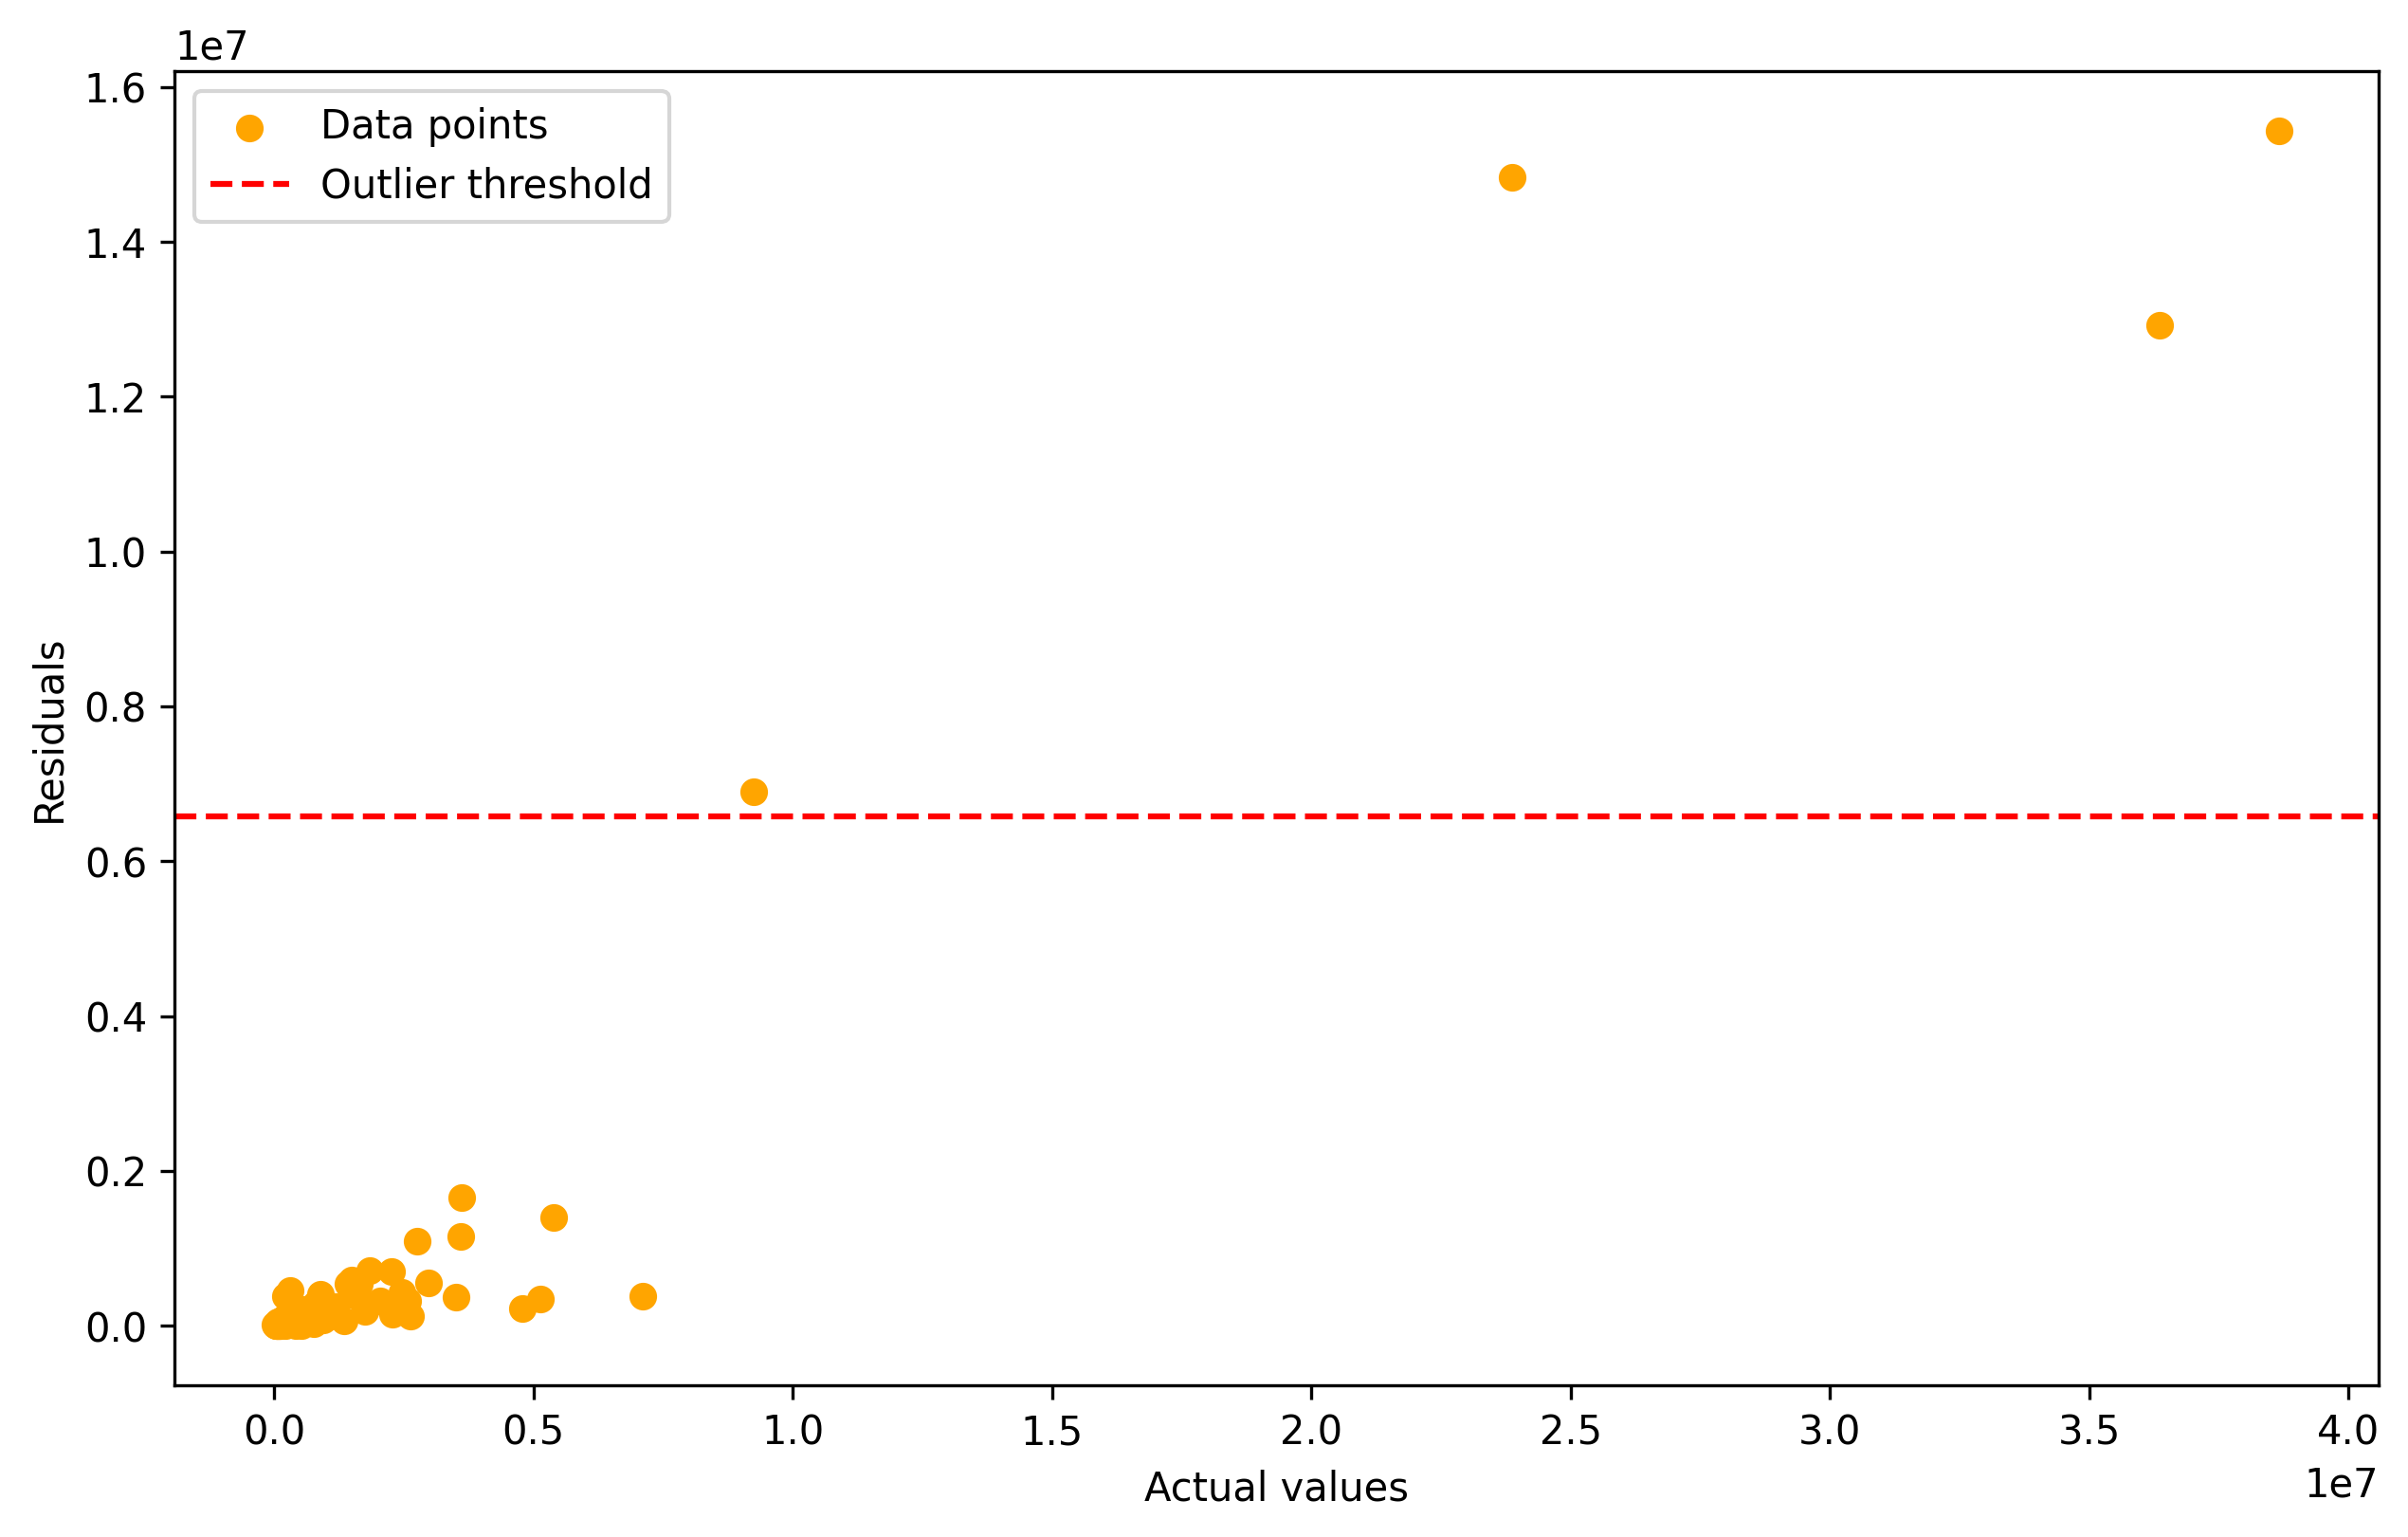

In [54]:
### Visualize the Outliers
# Plot residuals
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(y_test, residuals, color='orange', label='Data points')
plt.axhline(y=threshold, color='r', linestyle='--', label='Outlier threshold')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
#plt.title('Residuals and Outlier Threshold')
plt.legend()
plt.show()


In [73]:
# Step 1: Remove the outliers from the test set
# Flag rows where the residual is below the threshold (keeping only non-outliers in the test set)
non_outliers_idx = residuals <= threshold
X_test_cleaned = X_test[non_outliers_idx]
y_test_cleaned = y_test[non_outliers_idx]

# Step 2: Evaluate the original model on the cleaned test set (no retraining needed)
y_pred_cleaned = best_pipeline.predict(X_test_cleaned)

# Step 3: Evaluate the model performance without outliers in the test set
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mape_cleaned = mean_absolute_percentage_error(y_test_cleaned, y_pred_cleaned)

# Print the evaluation metrics after removing outliers from the test set
print(f'Mean Squared Error after removing outliers from test set: {mse_cleaned}')
print(f'Mean Absolute Percentage Error after removing outliers from test set: {mape_cleaned}')

Mean Squared Error after removing outliers from test set: 115896119500.1931
Mean Absolute Percentage Error after removing outliers from test set: 0.2306126258788408


In [61]:
# Define the XGBoost model
xgboost_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'model__n_estimators': [100, 200],  
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],  
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8, 1.0],  
    'model__colsample_bytree': [0.8, 1.0], 
    'model__gamma': [0, 0.1],
    'model__lambda': [1, 1.5],   
    'model__alpha': [0, 0.1]   
}

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgboost_model)])

# Wrap the search in a progress bar using tqdm
# Define the RandomizedSearchCV with 50 iterations
n_iter_search = 50
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=n_iter_search, cv=5, n_jobs=-1, 
                                   verbose=2, scoring='neg_mean_absolute_percentage_error', random_state=42)

# Progress bar using tqdm
with tqdm(total=n_iter_search) as pbar:
    for i in range(n_iter_search):
        # For each iteration, perform a fit and update the progress bar
        random_search.fit(X_train, y_train)
        pbar.update(1)

# Print the best parameters
print(f"Best Parameters: {random_search.best_params_}")

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  2%|█▋                                                                                 | 1/50 [00:37<30:51, 37.79s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  4%|███▎                                                                               | 2/50 [01:32<38:02, 47.56s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  6%|████▉                                                                              | 3/50 [02:18<36:43, 46.89s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  8%|██████▋                                                                            | 4/50 [03:05<36:11, 47.20s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 10%|████████▎                                                                          | 5/50 [04:19<42:32, 56.72s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 12%|█████████▉                                                                         | 6/50 [05:39<47:23, 64.62s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 14%|███████████▌                                                                       | 7/50 [06:21<41:03, 57.30s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 16%|█████████████▎                                                                     | 8/50 [07:11<38:27, 54.95s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 18%|██████████████▉                                                                    | 9/50 [08:12<38:53, 56.93s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 20%|████████████████▍                                                                 | 10/50 [10:15<51:22, 77.06s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 22%|██████████████████                                                                | 11/50 [11:10<45:43, 70.36s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 24%|███████████████████▋                                                              | 12/50 [11:54<39:29, 62.35s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 26%|█████████████████████▎                                                            | 13/50 [12:36<34:42, 56.27s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 28%|██████████████████████▉                                                           | 14/50 [13:22<31:54, 53.17s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 30%|████████████████████████▌                                                         | 15/50 [15:15<41:33, 71.24s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 32%|██████████████████████████▏                                                       | 16/50 [16:29<40:47, 71.99s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 34%|███████████████████████████▉                                                      | 17/50 [17:11<34:43, 63.14s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 36%|█████████████████████████████▌                                                    | 18/50 [17:54<30:23, 56.97s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 38%|███████████████████████████████▏                                                  | 19/50 [19:14<33:02, 63.94s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 40%|████████████████████████████████▊                                                 | 20/50 [20:42<35:33, 71.10s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 42%|██████████████████████████████████▍                                               | 21/50 [21:45<33:11, 68.68s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 44%|████████████████████████████████████                                              | 22/50 [22:36<29:34, 63.37s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 46%|█████████████████████████████████████▋                                            | 23/50 [23:17<25:31, 56.71s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 48%|███████████████████████████████████████▎                                          | 24/50 [23:58<22:29, 51.92s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 50%|█████████████████████████████████████████                                         | 25/50 [24:43<20:45, 49.80s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 52%|██████████████████████████████████████████▋                                       | 26/50 [25:24<18:51, 47.13s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 54%|████████████████████████████████████████████▎                                     | 27/50 [26:05<17:26, 45.51s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 56%|█████████████████████████████████████████████▉                                    | 28/50 [26:46<16:08, 44.03s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 58%|███████████████████████████████████████████████▌                                  | 29/50 [27:31<15:30, 44.33s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 60%|█████████████████████████████████████████████████▏                                | 30/50 [28:14<14:36, 43.82s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 62%|██████████████████████████████████████████████████▊                               | 31/50 [28:55<13:37, 43.04s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 64%|████████████████████████████████████████████████████▍                             | 32/50 [29:36<12:44, 42.46s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 66%|██████████████████████████████████████████████████████                            | 33/50 [30:17<11:54, 42.04s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [30:58<11:06, 41.64s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [31:40<10:27, 41.85s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 72%|███████████████████████████████████████████████████████████                       | 36/50 [32:21<09:40, 41.46s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [33:02<09:00, 41.55s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [33:44<08:18, 41.56s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [34:27<07:40, 41.84s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [35:09<07:01, 42.10s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [35:53<06:24, 42.74s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [36:37<05:43, 42.90s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [37:20<04:59, 42.86s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [38:01<04:15, 42.55s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [38:42<03:30, 42.09s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [39:25<02:48, 42.15s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [40:06<02:05, 41.80s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [40:49<01:24, 42.28s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [41:30<00:41, 41.73s/it]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [42:12<00:00, 50.65s/it]


Best Parameters: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__min_child_weight': 1, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__lambda': 1.5, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0, 'model__alpha': 0}


ValueError: Found input variables with inconsistent numbers of samples: [99, 103]

In [62]:
# Predict using the best model on the cleaned test set
y_pred_cleaned = random_search.predict(X_test_cleaned)

# Evaluate the model using the cleaned test set
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mape_cleaned = mean_absolute_percentage_error(y_test_cleaned, y_pred_cleaned)

# Print the evaluation metrics after removing outliers
print(f'Mean Squared Error after removing outliers: {mse_cleaned}')
print(f'Mean Absolute Percentage Error after removing outliers: {mape_cleaned}')


Mean Squared Error after removing outliers: 115896119500.1931
Mean Absolute Percentage Error after removing outliers: 0.2306126258788408


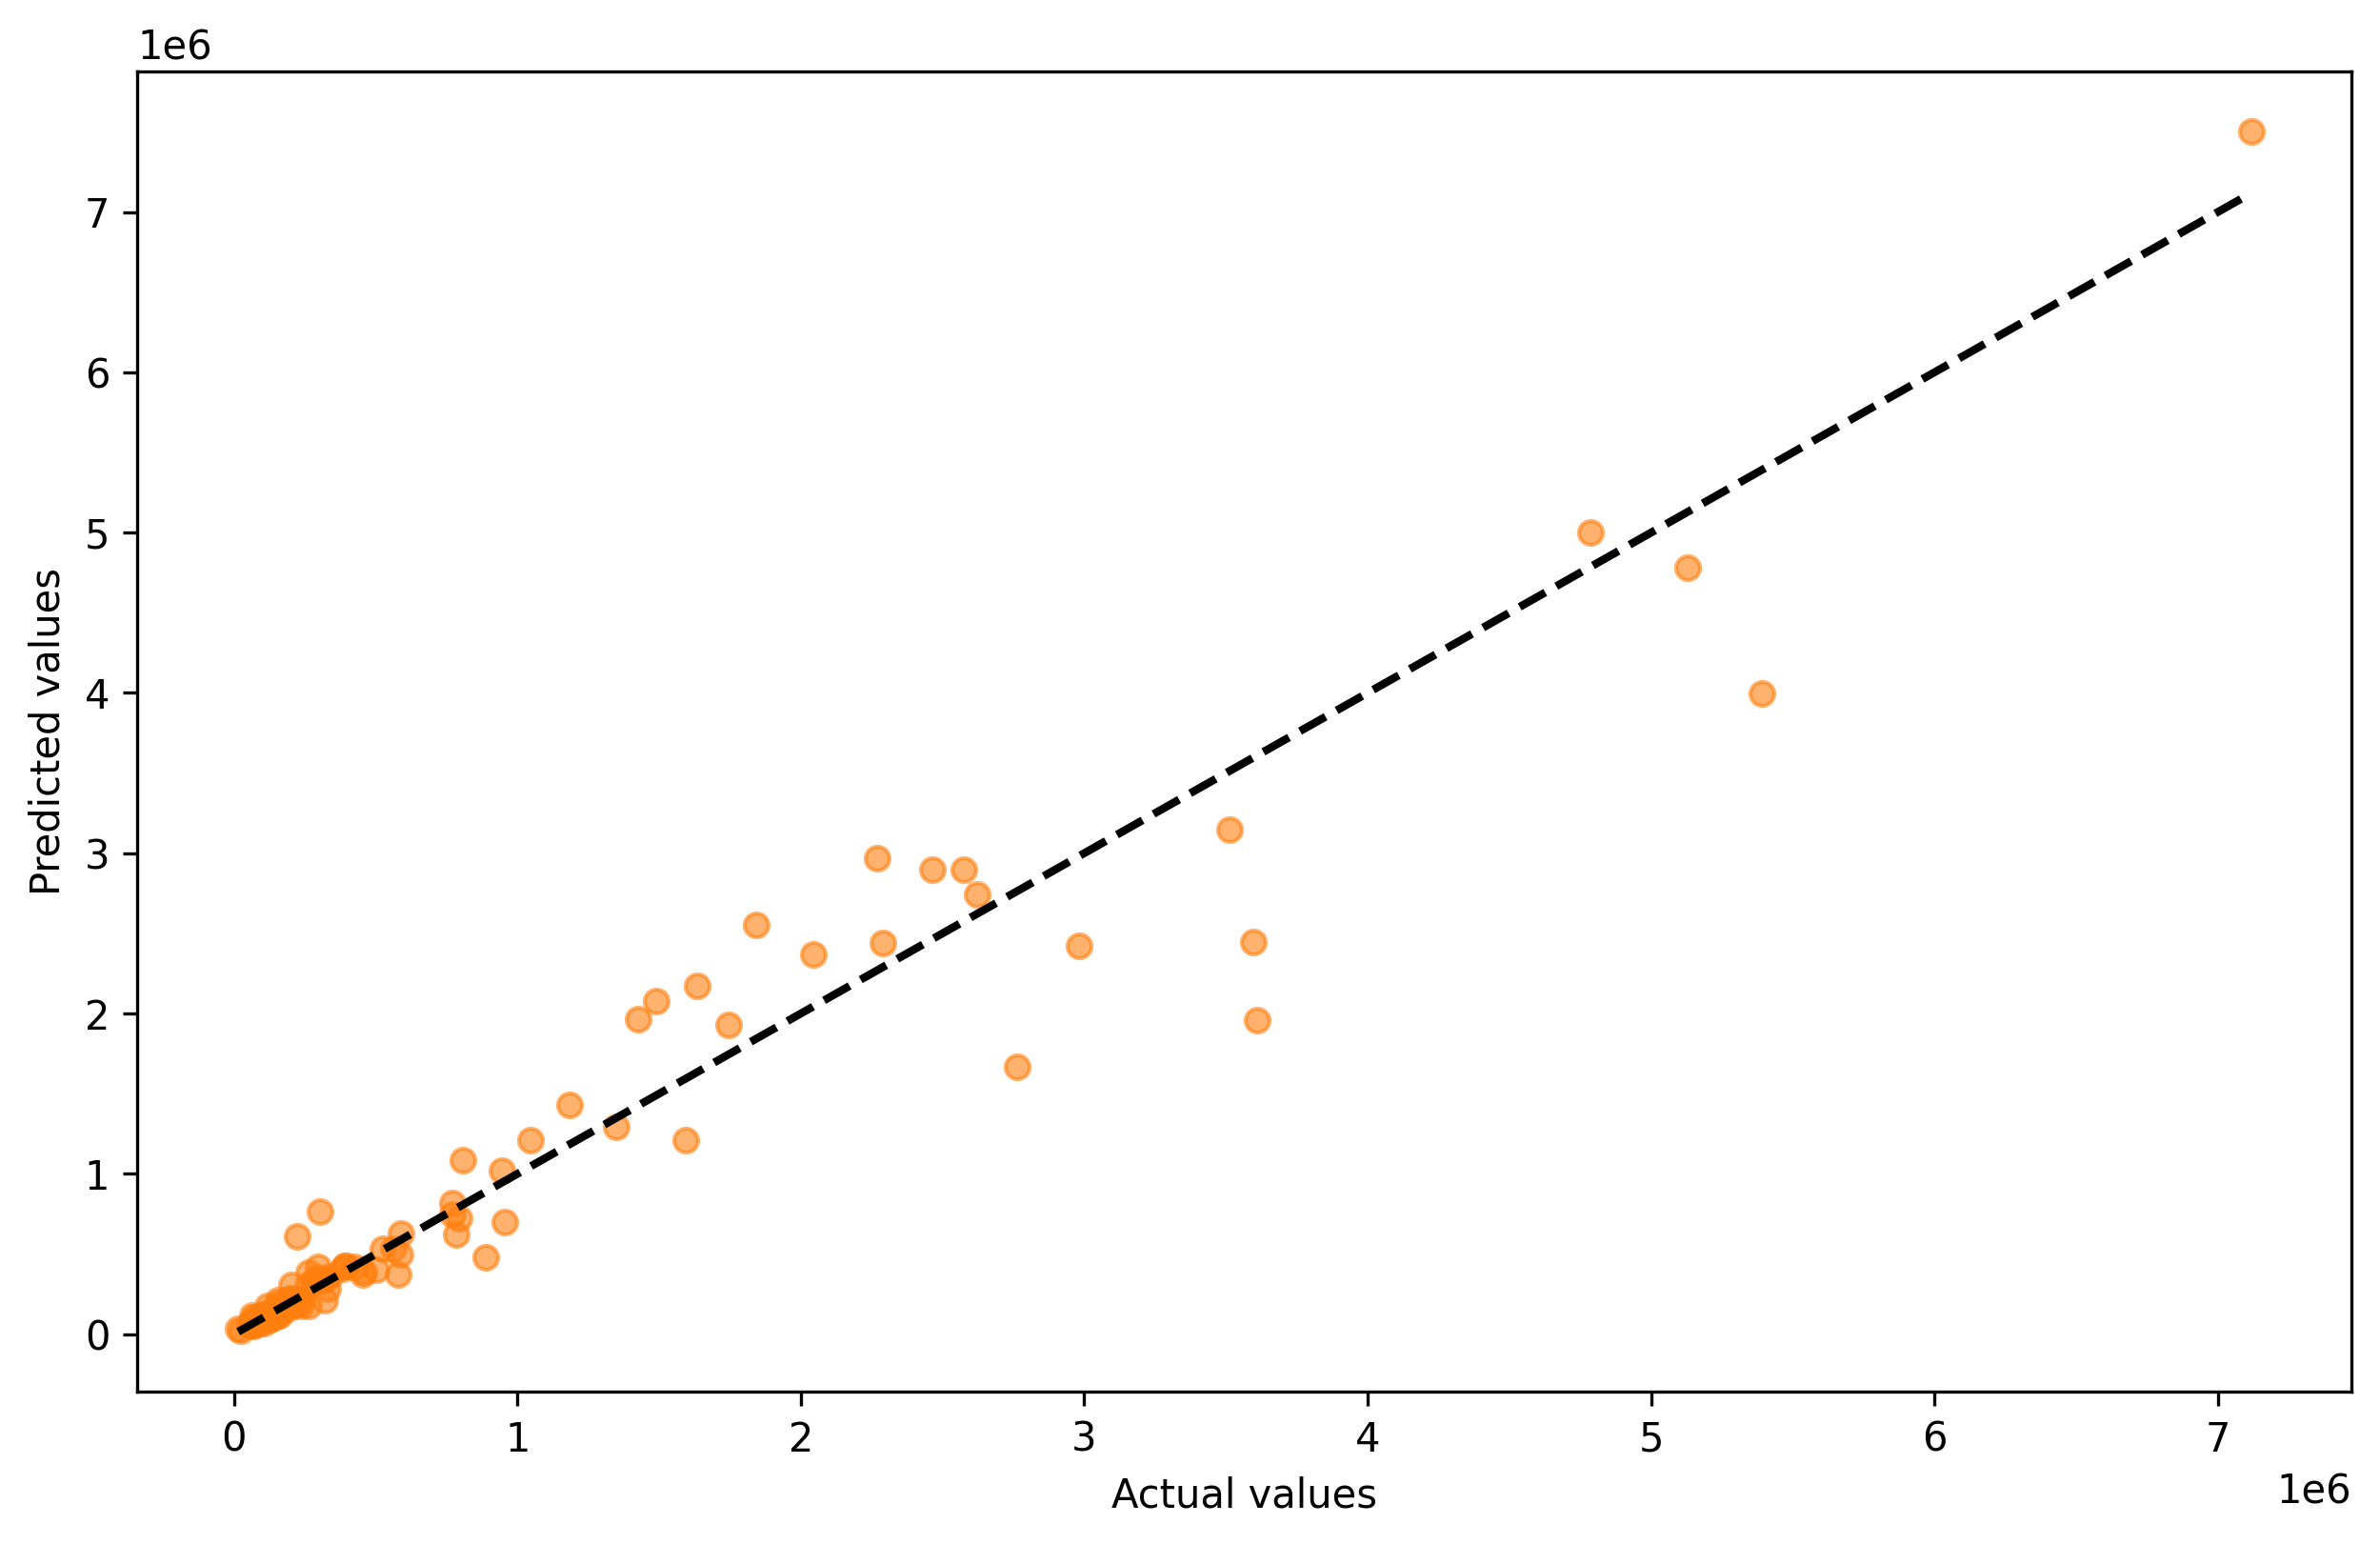

In [63]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.6)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'k--', lw=2)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
#plt.title('Actual vs Predicted Values')
plt.show()


In [64]:
#### Fine-Tuning Hyperparameters with a Smaller Grid
# Define a smaller hyperparameter grid around the best values for fine-tuning
param_grid_finetuned = {
    'model__n_estimators': [200, 300, 500],  
    'model__learning_rate': [0.05, 0.075, 0.1],
    'model__max_depth': [4, 5, 6],  
    'model__min_child_weight': [1, 2],
    'model__subsample': [0.8],  # fixed at the best value from previous search
    'model__colsample_bytree': [1.0],  # fixed at the best value from previous search
    'model__gamma': [0.05, 0.1],
    'model__lambda': [1.5],   # fixed at the best value
    'model__alpha': [0]  # fixed at the best value
}

# Create the pipeline with preprocessor and model
pipeline_finetuned = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', xgboost_model)])

# Use RandomizedSearchCV for the fine-tuned search
n_iter_finetuned = 20  # Reducing iterations to test this smaller grid faster
random_search_finetuned = RandomizedSearchCV(pipeline_finetuned, param_distributions=param_grid_finetuned, 
                                             n_iter=n_iter_finetuned, cv=5, n_jobs=-1, 
                                             verbose=2, scoring='neg_mean_absolute_percentage_error', random_state=42)

# Perform the search with a progress bar
from tqdm import tqdm

with tqdm(total=n_iter_finetuned) as pbar:
    for i in range(n_iter_finetuned):
        random_search_finetuned.fit(X_train, y_train)
        pbar.update(1)

# Print the best parameters after fine-tuning
print(f"Best Parameters (Fine-Tuned): {random_search_finetuned.best_params_}")

# Predict using the fine-tuned model
y_pred_finetuned = random_search_finetuned.predict(X_test)

# Evaluate the fine-tuned model
mse_finetuned = mean_squared_error(y_test, y_pred_finetuned)
mape_finetuned = mean_absolute_percentage_error(y_test, y_pred_finetuned)

print(f'Mean Squared Error after fine-tuning: {mse_finetuned}')
print(f'Mean Absolute Percentage Error after fine-tuning: {mape_finetuned}')

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


  5%|████▏                                                                              | 1/20 [00:48<15:27, 48.80s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 10%|████████▎                                                                          | 2/20 [02:38<25:24, 84.68s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 15%|████████████▍                                                                      | 3/20 [03:39<20:51, 73.60s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 20%|████████████████▌                                                                  | 4/20 [04:19<16:07, 60.50s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 25%|████████████████████▊                                                              | 5/20 [05:07<13:58, 55.93s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 30%|████████████████████████▉                                                          | 6/20 [06:11<13:41, 58.66s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 35%|█████████████████████████████                                                      | 7/20 [08:05<16:39, 76.85s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 40%|█████████████████████████████████▏                                                 | 8/20 [08:57<13:45, 68.82s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 45%|█████████████████████████████████████▎                                             | 9/20 [09:46<11:31, 62.82s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 50%|█████████████████████████████████████████                                         | 10/20 [11:35<12:49, 76.97s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 55%|█████████████████████████████████████████████                                     | 11/20 [13:02<12:01, 80.11s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 60%|█████████████████████████████████████████████████▏                                | 12/20 [13:49<09:19, 69.92s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [14:32<07:12, 61.85s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [15:43<06:28, 64.73s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [18:01<07:13, 86.79s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [19:02<05:15, 78.81s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [19:45<03:24, 68.20s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [20:29<02:01, 60.97s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [21:16<00:56, 56.57s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [22:53<00:00, 68.68s/it]

Best Parameters (Fine-Tuned): {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__min_child_weight': 1, 'model__max_depth': 5, 'model__learning_rate': 0.075, 'model__lambda': 1.5, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0, 'model__alpha': 0}
Mean Squared Error after fine-tuning: 6364948855408.016
Mean Absolute Percentage Error after fine-tuning: 0.23168109232250889


In [83]:
# Define the pipeline with preprocessor and model
xgboost_best_model = XGBRegressor(
    random_state=42,
    subsample=0.8,
    n_estimators=300,
    min_child_weight=1,
    max_depth=5,
    learning_rate=0.075,
    reg_lambda=1.5,
    gamma=0.1,
    colsample_bytree=1.0,
    reg_alpha=0
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgboost_best_model)])

# Fit the final model on the training data
best_pipeline.fit(X_train, y_train)

# Predict using the final model
y_pred_final = best_pipeline.predict(X_test)

# Evaluate the final model
mse_final = mean_squared_error(y_test, y_pred_final)
mape_final = mean_absolute_percentage_error(y_test, y_pred_final)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse_final}')
print(f'Mean Absolute Percentage Error: {mape_final}')

Mean Squared Error: 6639282952658.116
Mean Absolute Percentage Error: 0.24224723886156158


## Analyze Model Interpretability (SHAP Values) 

SHAP (SHapley Additive exPlanations) is a unified framework for interpreting the predictions of machine learning models. It is based on Shapley values from cooperative game theory, which quantify the contribution of each feature to the model’s prediction. SHAP values provide both local and global interpretability

In [80]:
# Ensure categorical columns are handled correctly
# Convert object columns to categorical type if necessary
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Train the best model again (if needed)
xgboost_best_model = xgb.XGBRegressor(**random_search.best_params_, use_label_encoder=False, enable_categorical=True)
xgboost_best_model.fit(X_train, y_train)

# Create a SHAP explainer based on the best model
explainer = shap.Explainer(xgboost_best_model)
shap_values = explainer(X_test)

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model__alpha", "model__colsample_bytree", "model__gamma", "model__lambda", "model__learning_rate", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__subsample", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


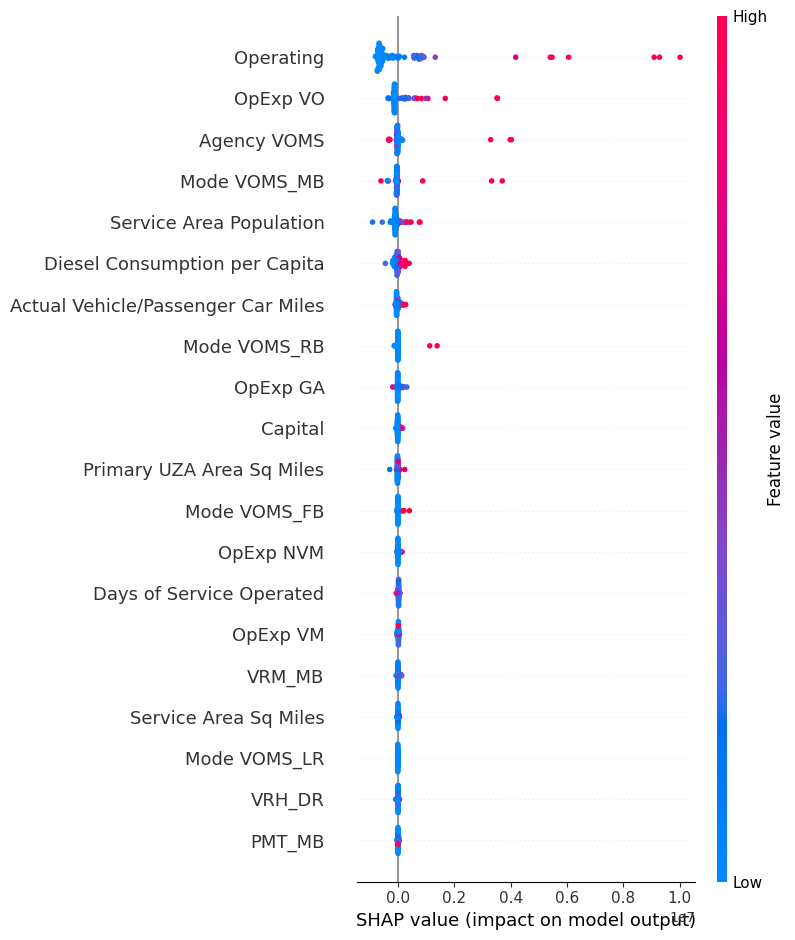

In [81]:

# Plot SHAP summary to interpret feature importance
shap.summary_plot(shap_values, X_test)
